## Gauss-Jacobi

In [ ]:
# Algoritmo Gauss-Jacobi para Matriz Tridiagonal
import numpy as np
import timeit

# x: vetor solução
# x0: chute inicial
# b: termo independente

def erro_relativo(x,x0,n):
  e1 = 0
  e2 = 0
  for i in range(n):
    e1 += (x[i] - x0[i])**2
    e2 += (x[i])**2
  erro_rel = (e1**(1/2))/(e2**(1/2))
  return(erro_rel)

def Gauss_Jacobi(d,a,n,x0,b):
  x = np.zeros((n,1))
  tol = 10**(-8)
  kmax = 1000
  erro = 1
  k = 0
  while((erro > tol) or (k == kmax)):
    for i in range(0,n):
      if i == 0:
        x[i] = (b[i] - a*x0[i+1])/d
      elif(1 <= i <= (n-2)):
        x[i] = (b[i] - a*(x0[i-1] + x0[i+1]))/d
      else:
        x[i] = (b[i] - a*x0[i-1])/d
    erro = erro_relativo(x,x0,n)
    x0 = x
    x = np.zeros((n,1))
    k += 1
  return(x0,k)

def sol_GJ(n):
  d = 5
  a = -2
  e = np.ones(n)
  b = (d + (2*a))*e
  #chute inicial: x0 = [0.5,0.5,...,0.5]
  x0 = np.ones(n)*(0.5)
  s,k = Gauss_Jacobi(d,a,n,x0,b)
  return(s,k)

t = timeit.Timer("sol_GJ(64)","from __main__ import sol_GJ")
print(t.repeat(5,1))
u = timeit.Timer("sol_GJ(128)","from __main__ import sol_GJ")
print(u.repeat(5,1))
v = timeit.Timer("sol_GJ(256)","from __main__ import sol_GJ")
print(v.repeat(5,1))
w = timeit.Timer("sol_GJ(512)","from __main__ import sol_GJ")
print(w.repeat(5,1))
x = timeit.Timer("sol_GJ(1024)","from __main__ import sol_GJ")
print(x.repeat(5,1))
y = timeit.Timer("sol_GJ(2048)","from __main__ import sol_GJ")
print(y.repeat(5,1))

[0.053814341000133936, 0.05713012000001072, 0.0535171450001144, 0.05899224699987826, 0.05446562199995242]
[0.12947625900005733, 0.13498637899988353, 0.11230796200015902, 0.13335006200009047, 0.11908538900001986]
[0.26391572000011365, 0.22892263599987928, 0.24123164200000247, 0.22359877700000652, 0.2298108229999798]
[0.5356992200001969, 0.5420304350000151, 0.45252757999992355, 0.5216447889999927, 0.4725059729998975]
[0.9918071650001821, 0.93138382799998, 1.0211052510001082, 0.9031272090001039, 0.9896137630000794]
[2.02104055399991, 1.9891072820000772, 2.002776926000024, 1.9268147150000914, 2.001028000000133]


In [ ]:
# cálculo dos tempos médios
L1 = [0.053814341000133936, 0.05713012000001072, 0.0535171450001144,
      0.05899224699987826, 0.05446562199995242]
L2 = [0.12947625900005733, 0.13498637899988353, 0.11230796200015902,
      0.13335006200009047, 0.11908538900001986]
L3 = [0.26391572000011365, 0.22892263599987928, 0.24123164200000247,
      0.22359877700000652, 0.2298108229999798]
L4 = [0.5356992200001969, 0.5420304350000151, 0.45252757999992355,
      0.5216447889999927, 0.4725059729998975]
L5 = [0.9918071650001821, 0.93138382799998, 1.0211052510001082,
      0.9031272090001039, 0.9896137630000794]
L6 = [2.02104055399991, 1.9891072820000772, 2.002776926000024,
      1.9268147150000914, 2.001028000000133]

M1 = sum(L1)/5
M2 = sum(L2)/5
M3 = sum(L3)/5
M4 = sum(L4)/5
M5 = sum(L5)/5
M6 = sum(L6)/5

T5 = [M1,M2,M3,M4,M5,M6]
print(T5)

[0.055583895000017945, 0.12584121020004205, 0.23749591959999633, 0.5048815994000051, 0.9674074432000908, 1.9881534954000473]


## Gauss-Seidel

In [ ]:
# Algoritmo Gauss-Seidel para Matriz Tridiagonal
import numpy as np
import timeit

# x: vetor solução
# x0: chute inicial
# b: termo independente

def erro_relativo(x,x0,n):
  e1 = 0
  e2 = 0
  for i in range(n):
    e1 += (x[i] - x0[i])**2
    e2 += (x[i])**2
  erro_rel = (e1**(1/2))/(e2**(1/2))
  return(erro_rel)

def Gauss_Seidel(d,a,n,x0,b):
  x = np.zeros((n,1))
  tol = 10**(-8)
  kmax = 1000
  k = 0
  erro = 1
  while((erro > tol) or (k == kmax)):
    for i in range(0,n):
      if i == 0:
        x[i] = (b[i] - a*x0[i+1])/d
      elif(1 <= i <= (n-2)):
        x[i] = (b[i] - a*(x[i-1] + x0[i+1]))/d
      else:
        x[i] = (b[i] - a*x[i-1])/d
    erro = erro_relativo(x,x0,n)
    x0 = x
    x = np.zeros((n,1))
    k += 1
  return(x0,k)

def sol_GS(n):
  d = 5
  a = -2
  e = np.ones(n)
  b = (d + (2*a))*e
  #chute inicial: x0 = [0.5,0.5,...,0.5]
  x0 = np.ones(n)*(0.5)
  s,k = Gauss_Seidel(d,a,n,x0,b)
  return(s,k)

t = timeit.Timer("sol_GS(64)","from __main__ import sol_GS")
print(t.repeat(5,1))
u = timeit.Timer("sol_GS(128)","from __main__ import sol_GS")
print(u.repeat(5,1))
v = timeit.Timer("sol_GS(256)","from __main__ import sol_GS")
print(v.repeat(5,1))
w = timeit.Timer("sol_GS(512)","from __main__ import sol_GS")
print(w.repeat(5,1))
x = timeit.Timer("sol_GS(1024)","from __main__ import sol_GS")
print(x.repeat(5,1))
y = timeit.Timer("sol_GS(2048)","from __main__ import sol_GS")
print(y.repeat(5,1))

[0.04330144699997618, 0.033093189000055645, 0.030939083000021128, 0.030725381999900492, 0.039109016000111296]
[0.06284687500010477, 0.07254063899995344, 0.06212137900001835, 0.0664148529999693, 0.06890912900007606]
[0.13353992299994388, 0.1535117049998007, 0.1824278230001255, 0.1351293939999323, 0.13312590500004262]
[0.30439099699992767, 0.29696919999992133, 0.3080461850001939, 0.3034953899998527, 0.36582788900000196]
[0.563515968000047, 0.5118756900001245, 0.5981717750000826, 0.5829629279999153, 0.54221560100018]
[1.1819610099998954, 1.0435599129998536, 1.042485021999937, 1.0490284649999921, 1.115447986999925]


In [ ]:
# cálculo dos tempos médios
L1 = [0.04330144699997618, 0.033093189000055645, 0.030939083000021128,
      0.030725381999900492, 0.039109016000111296]
L2 = [0.06284687500010477, 0.07254063899995344, 0.06212137900001835,
      0.0664148529999693, 0.06890912900007606]
L3 = [0.13353992299994388, 0.1535117049998007, 0.1824278230001255,
      0.1351293939999323, 0.13312590500004262]
L4 = [0.30439099699992767, 0.29696919999992133, 0.3080461850001939,
      0.3034953899998527, 0.36582788900000196]
L5 = [0.563515968000047, 0.5118756900001245, 0.5981717750000826,
      0.5829629279999153, 0.54221560100018]
L6 = [1.1819610099998954, 1.0435599129998536, 1.042485021999937,
      1.0490284649999921, 1.115447986999925]

M1 = sum(L1)/5
M2 = sum(L2)/5
M3 = sum(L3)/5
M4 = sum(L4)/5
M5 = sum(L5)/5
M6 = sum(L6)/5

T6 = [M1,M2,M3,M4,M5,M6]
print(T6)

[0.03543362340001295, 0.06656657500002439, 0.147546949999969, 0.3157459321999795, 0.5597483924000699, 1.0864964793999206]


## Gráficos $loglog$ e Cálculo da Ordem de Custo

## Métodos Diretos

Text(0.5, 1.0, 'Métodos Diretos')

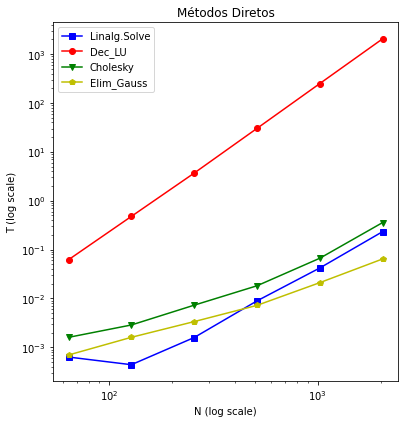

In [ ]:
import matplotlib.pyplot as plt

N = [64,128,256,512,1024,2048]
T1 = [0.0006330077999962214, 0.0004412558000012723, 0.0015882556000121895,
      0.008930649400008405, 0.04211036579999927, 0.23331797320000192]
T2 = [0.0619863745999993, 0.47744926880000094, 3.6743955072000034,
      30.193044147000002, 249.85893243279997, 2058.7659069878]
T3 = [0.0016009869999948022, 0.0028666698000051837, 0.007290255999998862,
      0.018185219200000803, 0.06660275520000028, 0.3579422501999943]
T4 = [0.000697002199990493, 0.001604047199998604, 0.0033626451999907657,
      0.007228123599992387, 0.021085204199994222, 0.06442479459999503]

plt.figure(0,figsize =(6,6))
plt.subplots_adjust(right = 0.97, top = 0.98, left = 0.17, bottom = 0.15)
plt.loglog(N, T1, "b-s", N, T2, "r-o", N, T3, "g-v", N, T4, "y-p")
plt.xlabel("N (log scale)")
plt.ylabel("T (log scale)")
plt.legend(["Linalg.Solve","Dec_LU","Cholesky","Elim_Gauss"])
plt.title("Métodos Diretos")

In [ ]:
#Plano 4: Cálculo baseado nos quatro últimos pares ordenados
import numpy as np

N = [64,128,256,512,1024,2048]
T1 = [0.0006330077999962214, 0.0004412558000012723, 0.0015882556000121895,
      0.008930649400008405, 0.04211036579999927, 0.23331797320000192]
T2 = [0.0619863745999993, 0.47744926880000094, 3.6743955072000034,
      30.193044147000002, 249.85893243279997, 2058.7659069878]
T3 = [0.0016009869999948022, 0.0028666698000051837, 0.007290255999998862,
      0.018185219200000803, 0.06660275520000028, 0.3579422501999943]
T4 = [0.000697002199990493, 0.001604047199998604, 0.0033626451999907657,
      0.007228123599992387, 0.021085204199994222, 0.06442479459999503]

m = len(N)
p1 = np.polyfit(np.log(np.array(N[m-4:m])), np.log(np.array(T1[m-4:m])),1)
p2 = np.polyfit(np.log(np.array(N[m-4:m])), np.log(np.array(T2[m-4:m])),1)
p3 = np.polyfit(np.log(np.array(N[m-4:m])), np.log(np.array(T3[m-4:m])),1)
p4 = np.polyfit(np.log(np.array(N[m-4:m])), np.log(np.array(T4[m-4:m])),1)

print(p1)
print(p2)
print(p3)
print(p4)

[  2.383347  -19.6406473]
[  3.04389971 -15.57883012]
[  1.87256562 -15.49684295]
[  1.43243806 -13.73901972]


## Métodos Iterativos

Text(0.5, 1.0, 'Métodos Iterativos')

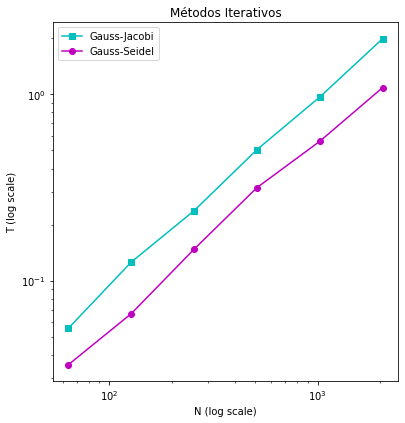

In [ ]:
import matplotlib.pyplot as plt

N = [64,128,256,512,1024,2048]
T5 = [0.055583895000017945, 0.12584121020004205, 0.23749591959999633,
      0.5048815994000051, 0.9674074432000908, 1.9881534954000473]
T6 = [0.03543362340001295, 0.06656657500002439, 0.147546949999969,
      0.3157459321999795, 0.5597483924000699, 1.0864964793999206]

plt.figure(0,figsize =(6,6))
plt.subplots_adjust(right = 0.97, top = 0.98, left = 0.17, bottom = 0.15)
plt.loglog(N, T5, "c-s", N, T6, "m-o")
plt.xlabel("N (log scale)")
plt.ylabel("T (log scale)")
plt.legend(["Gauss-Jacobi", "Gauss-Seidel"])
plt.title("Métodos Iterativos")

In [ ]:
#Plano 4: Cálculo baseado nos quatro últimos pares ordenados
import numpy as np

N = [64,128,256,512,1024,2048]
T5 = [0.055583895000017945, 0.12584121020004205, 0.23749591959999633,
      0.5048815994000051, 0.9674074432000908, 1.9881534954000473]
T6 = [0.03543362340001295, 0.06656657500002439, 0.147546949999969,
      0.3157459321999795, 0.5597483924000699, 1.0864964793999206]

m = len(N)
p5 = np.polyfit(np.log(np.array(N[m-4:m])), np.log(np.array(T5[m-4:m])),1)
p6 = np.polyfit(np.log(np.array(N[m-4:m])), np.log(np.array(T6[m-4:m])),1)

print(p5)
print(p6)

[ 1.01345421 -7.04023415]
[ 0.94673268 -7.12507231]


## Estimação de tempo

# linalg.solve

In [ ]:
# Estimação de tempo para resolução de sistemas de ordem n = 1 mi e n = 1 bi
import numpy as np

N = [64,128,256,512,1024,2048]
T1 = [0.0006330077999962214, 0.0004412558000012723, 0.0015882556000121895,
      0.008930649400008405, 0.04211036579999927, 0.23331797320000192]

# função polyfit
a = 2.383347  
b = -19.6406473

def est_tempo(a,x,b):
  y = a*x + b
  return(y)

y1 = est_tempo(a,np.log(N[2]),b)
y2 = est_tempo(a,np.log(N[3]),b)
y3 = est_tempo(a,np.log(N[4]),b)
y4 = est_tempo(a,np.log(N[5]),b)

print("Tempo obtido n = 256: ",T1[2]," | Tempo estimado n = 256: ", np.exp(y1))
print("Tempo obtido n = 512: ",T1[3]," | Tempo estimado n = 512: ", np.exp(y2))
print("Tempo obtido n = 1024: ",T1[4]," | Tempo estimado n = 1024: ", np.exp(y3))
print("Tempo obtido n = 2048: ",T1[5]," | Tempo estimado n = 2048: ", np.exp(y4))

# n = 1 mi
n1 = 10**6
y_1mi = est_tempo(a,np.log(n1),b)
print("Tempo estimado n = 10^6: ",np.exp(y_1mi))

# n = 1 bi
n2 = 10**9
y_1bi = est_tempo(a,np.log(n2),b)
print("Tempo estimado n = 10^9: ",np.exp(y_1bi))

Tempo obtido n = 256:  0.0015882556000121895  | Tempo estimado n = 256:  0.0016212379202760537
Tempo obtido n = 512:  0.008930649400008405  | Tempo estimado n = 512:  0.008458740276942073
Tempo obtido n = 1024:  0.04211036579999927  | Tempo estimado n = 1024:  0.044133119622923045
Tempo obtido n = 2048:  0.23331797320000192  | Tempo estimado n = 2048:  0.23026268497220784
Tempo estimado n = 10^6:  589192.5632952568
Tempo estimado n = 10^9:  8323351903847.6875


# Decomposição Lu

In [ ]:
import numpy as np

N = [64,128,256,512,1024,2048]
T2 = [0.0619863745999993, 0.47744926880000094, 3.6743955072000034,
      30.193044147000002, 249.85893243279997, 2058.7659069878]

# Função polyfit
a = 3.04389971 
b = -15.57883012

def est_tempo(a,x,b):
  y = a*x + b
  return(y)

y1 = est_tempo(a,np.log(N[2]),b)
y2 = est_tempo(a,np.log(N[3]),b)
y3 = est_tempo(a,np.log(N[4]),b)
y4 = est_tempo(a,np.log(N[5]),b)

print("Tempo obtido n = 256: ",T2[2]," | Tempo estimado n = 256: ", np.exp(y1))
print("Tempo obtido n = 512: ",T2[3]," | Tempo estimado n = 512: ", np.exp(y2))
print("Tempo obtido n = 1024: ",T2[4]," | Tempo estimado n = 1024: ", np.exp(y3))
print("Tempo obtido n = 2048: ",T2[5]," | Tempo estimado n = 2048: ", np.exp(y4))

# n = 1 mi
n1 = 10**6
y_1mi = est_tempo(a,np.log(n1),b)
print("Tempo estimado n = 10^6: ",np.exp(y_1mi))

# n = 1 bi
n2 = 10**9
y_1bi = est_tempo(a,np.log(n2),b)
print("Tempo estimado n = 10^9: ",np.exp(y_1bi))

Tempo obtido n = 256:  3.6743955072000034  | Tempo estimado n = 256:  3.6697880015393904
Tempo obtido n = 512:  30.193044147000002  | Tempo estimado n = 512:  30.265377337291675
Tempo obtido n = 1024:  249.85893243279997  | Tempo estimado n = 1024:  249.60380953461453
Tempo obtido n = 2048:  2058.7659069878  | Tempo estimado n = 2048:  2058.5258541424505
Tempo estimado n = 10^6:  314483818700.16644
Tempo estimado n = 10^9:  4.258899916856967e+20


# Decomposição de Cholesky

In [ ]:
import numpy as np

N = [64,128,256,512,1024,2048]
T3 = [0.0016009869999948022, 0.0028666698000051837, 0.007290255999998862,
      0.018185219200000803, 0.06660275520000028, 0.3579422501999943]

# Função polyfit
a = 1.87256562 
b = -15.49684295

def est_tempo(a,x,b):
  y = a*x + b
  return(y)

y1 = est_tempo(a,np.log(N[2]),b)
y2 = est_tempo(a,np.log(N[3]),b)
y3 = est_tempo(a,np.log(N[4]),b)
y4 = est_tempo(a,np.log(N[5]),b)

print("Tempo obtido n = 256: ",T3[2]," | Tempo estimado n = 256: ", np.exp(y1))
print("Tempo obtido n = 512: ",T3[3]," | Tempo estimado n = 512: ", np.exp(y2))
print("Tempo obtido n = 1024: ",T3[4]," | Tempo estimado n = 1024: ", np.exp(y3))
print("Tempo obtido n = 2048: ",T3[5]," | Tempo estimado n = 2048: ", np.exp(y4))

# n = 1 mi
n1 = 10**6
y_1mi = est_tempo(a,np.log(n1),b)
print("Tempo estimado n = 10^6: ",np.exp(y_1mi))

# n = 1 bi
n2 = 10**9
y_1bi = est_tempo(a,np.log(n2),b)
print("Tempo estimado n = 10^9: ",np.exp(y_1bi))

Tempo obtido n = 256:  0.007290255999998862  | Tempo estimado n = 256:  0.006017193582494108
Tempo obtido n = 512:  0.018185219200000803  | Tempo estimado n = 512:  0.02203395225926237
Tempo obtido n = 1024:  0.06660275520000028  | Tempo estimado n = 1024:  0.0806846323801032
Tempo obtido n = 2048:  0.3579422501999943  | Tempo estimado n = 2048:  0.2954535720923971
Tempo estimado n = 10^6:  32003.710993052333
Tempo estimado n = 10^9:  13270802926.912249


In [2]:
# Alternativa para estimação do tempo de linalg.solve
import numpy as np

N = [64,128,256,512,1024,2048]
T3 = [0.0016009869999948022, 0.0028666698000051837, 0.007290255999998862,
      0.018185219200000803, 0.06660275520000028, 0.3579422501999943]

# função polyfit
m = len(N)
p3 = np.polyfit(np.log(np.array(N[m-4:m])), np.log(np.array(T3[m-4:m])),2)

a = p3[0]
b = p3[1]
c = p3[2]

def est_tempo(a,b,c,x):
  y = a*(x**2) + b*x + c
  return(y)

y1 = est_tempo(a,b,c,np.log(N[2]))
y2 = est_tempo(a,b,c,np.log(N[3]))
y3 = est_tempo(a,b,c,np.log(N[4]))
y4 = est_tempo(a,b,c,np.log(N[5]))

print("Tempo obtido n = 256: ",T3[2]," | Tempo estimado n = 256: ", np.exp(y1))
print("Tempo obtido n = 512: ",T3[3]," | Tempo estimado n = 512: ", np.exp(y2))
print("Tempo obtido n = 1024: ",T3[4]," | Tempo estimado n = 1024: ", np.exp(y3))
print("Tempo obtido n = 2048: ",T3[5]," | Tempo estimado n = 2048: ", np.exp(y4))

# n = 1 mi
n1 = 10**6
y_1mi = est_tempo(a,b,c,np.log(n1))
print("Tempo estimado n = 10^6: ",np.exp(y_1mi))

# n = 1 bi
n2 = 10**9
y_1bi = est_tempo(a,b,c,np.log(n2))
print("Tempo estimado n = 10^9: ",np.exp(y_1bi))

Tempo obtido n = 256:  0.007290255999998862  | Tempo estimado n = 256:  0.007290045517923095
Tempo obtido n = 512:  0.018185219200000803  | Tempo estimado n = 512:  0.01818679440547561
Tempo obtido n = 1024:  0.06660275520000028  | Tempo estimado n = 1024:  0.06659698656247794
Tempo obtido n = 2048:  0.3579422501999943  | Tempo estimado n = 2048:  0.35795258489923804
Tempo estimado n = 10^6:  29476971096206.773
Tempo estimado n = 10^9:  4.908416863591909e+44


# Eliminação de Gauss

In [ ]:
import numpy as np

N = [64,128,256,512,1024,2048]
T4 = [0.000697002199990493, 0.001604047199998604, 0.0033626451999907657,
      0.007228123599992387, 0.021085204199994222, 0.06442479459999503]

# Função polyfit
a = 1.43243806 
b = -13.73901972

def est_tempo(a,x,b):
  y = a*x + b
  return(y)

y1 = est_tempo(a,np.log(N[2]),b)
y2 = est_tempo(a,np.log(N[3]),b)
y3 = est_tempo(a,np.log(N[4]),b)
y4 = est_tempo(a,np.log(N[5]),b)

print("Tempo obtido n = 256: ",T4[2]," | Tempo estimado n = 256: ", np.exp(y1))
print("Tempo obtido n = 512: ",T4[3]," | Tempo estimado n = 512: ", np.exp(y2))
print("Tempo obtido n = 1024: ",T4[4]," | Tempo estimado n = 1024: ", np.exp(y3))
print("Tempo obtido n = 2048: ",T4[5]," | Tempo estimado n = 2048: ", np.exp(y4))

# n = 1 mi
n1 = 10**6
y_1mi = est_tempo(a,np.log(n1),b)
print("Tempo estimado n = 10^6: ",np.exp(y_1mi))

# n = 1 bi
n2 = 10**9
y_1bi = est_tempo(a,np.log(n2),b)
print("Tempo estimado n = 10^9: ",np.exp(y_1bi))

Tempo obtido n = 256:  0.0033626451999907657  | Tempo estimado n = 256:  0.0030400038440522377
Tempo obtido n = 512:  0.007228123599992387  | Tempo estimado n = 512:  0.008205044782863725
Tempo obtido n = 1024:  0.021085204199994222  | Tempo estimado n = 1024:  0.022145616697332792
Tempo obtido n = 2048:  0.06442479459999503  | Tempo estimado n = 2048:  0.05977156150682417
Tempo estimado n = 10^6:  424.4708870090471
Tempo estimado n = 10^9:  8417092.285723453


# Gauss-Jacobi

In [ ]:
import numpy as np

N = [64,128,256,512,1024,2048]
T5 = [0.055583895000017945, 0.12584121020004205, 0.23749591959999633,
      0.5048815994000051, 0.9674074432000908, 1.9881534954000473]

# Função polyfit 
a = 1.01345421 
b = -7.04023415

def est_tempo(a,x,b):
  y = a*x + b
  return(y)

y1 = est_tempo(a,np.log(N[2]),b)
y2 = est_tempo(a,np.log(N[3]),b)
y3 = est_tempo(a,np.log(N[4]),b)
y4 = est_tempo(a,np.log(N[5]),b)

print("Tempo obtido n = 256: ",T5[2]," | Tempo estimado n = 256: ", np.exp(y1))
print("Tempo obtido n = 512: ",T5[3]," | Tempo estimado n = 512: ", np.exp(y2))
print("Tempo obtido n = 1024: ",T5[4]," | Tempo estimado n = 1024: ", np.exp(y3))
print("Tempo obtido n = 2048: ",T5[5]," | Tempo estimado n = 2048: ", np.exp(y4))

# n = 1 mi
n1 = 10**6
y_1mi = est_tempo(a,np.log(n1),b)
print("Tempo estimado n = 10^6: ",np.exp(y_1mi))

# n = 1 bi
n2 = 10**9
y_1bi = est_tempo(a,np.log(n2),b)
print("Tempo estimado n = 10^9: ",np.exp(y_1bi))

Tempo obtido n = 256:  0.23749591959999633  | Tempo estimado n = 256:  0.24160509521080817
Tempo obtido n = 512:  0.5048815994000051  | Tempo estimado n = 512:  0.48773756451958544
Tempo obtido n = 1024:  0.9674074432000908  | Tempo estimado n = 1024:  0.9846147145031521
Tempo obtido n = 2048:  1.9881534954000473  | Tempo estimado n = 2048:  1.9876798642135223
Tempo estimado n = 10^6:  1054.8492959527423
Tempo estimado n = 10^9:  1157585.4179239953


# Gauss-Seidel

In [ ]:
import numpy as np

N = [64,128,256,512,1024,2048]
T6 = [0.03543362340001295, 0.06656657500002439, 0.147546949999969,
      0.3157459321999795, 0.5597483924000699, 1.0864964793999206]

# Função polyfit
a = 0.94673268 
b = -7.12507231

def est_tempo(a,x,b):
  y = a*x + b
  return(y)

y1 = est_tempo(a,np.log(N[2]),b)
y2 = est_tempo(a,np.log(N[3]),b)
y3 = est_tempo(a,np.log(N[4]),b)
y4 = est_tempo(a,np.log(N[5]),b)

print("Tempo obtido n = 256: ",T6[2]," | Tempo estimado n = 256: ", np.exp(y1))
print("Tempo obtido n = 512: ",T6[3]," | Tempo estimado n = 512: ", np.exp(y2))
print("Tempo obtido n = 1024: ",T6[4]," | Tempo estimado n = 1024: ", np.exp(y3))
print("Tempo obtido n = 2048: ",T6[5]," | Tempo estimado n = 2048: ", np.exp(y4))

# n = 1 mi
n1 = 10**6
y_1mi = est_tempo(a,np.log(n1),b)
print("Tempo estimado n = 10^6: ",np.exp(y_1mi))

# n = 1 bi
n2 = 10**9
y_1bi = est_tempo(a,np.log(n2),b)
print("Tempo estimado n = 10^9: ",np.exp(y_1bi))

Tempo obtido n = 256:  0.147546949999969  | Tempo estimado n = 256:  0.15331332023190586
Tempo obtido n = 512:  0.3157459321999795  | Tempo estimado n = 512:  0.2955117975143914
Tempo obtido n = 1024:  0.5597483924000699  | Tempo estimado n = 1024:  0.5695997082190455
Tempo obtido n = 2048:  1.0864964793999206  | Tempo estimado n = 2048:  1.0979048225220913
Tempo estimado n = 10^6:  385.49299672614166
Tempo estimado n = 10^9:  266817.63636733405
